<a href="https://colab.research.google.com/github/pseudope/2021_F_Level2/blob/main/20210910_Level2_LSA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

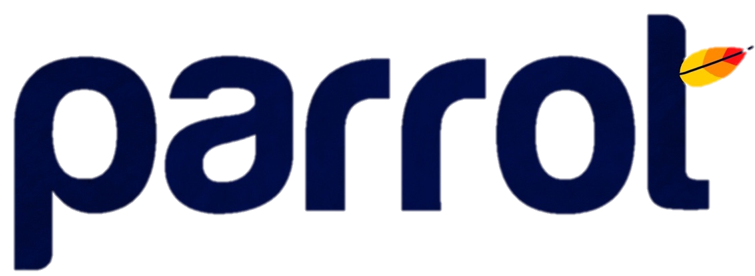

# 20210910 (LSA, LDA)

5기 Level 2 LSA, LDA 자료입니다.

# Contents


1. 기초 선형대수학 복습
2. 잠재 의미 분석(Latent Semantic Analysis, LSA)
3. 잠재 디리클레 할당 (Latent Dirichlet Allocation, LDA)

In [19]:
!pip install pyLDAvis   # 제일 마지막에 필요합니다

## 1. 기초 선형대수학 정리

## 1-1. 행렬 복습

* 전치 행렬 (Transposed Matrix) <br>
특정 행렬 $A$를 주 대각선(main diagonal)을 기준으로 대칭으로 변환한 행렬 $A^T$를 행렬 $A$의 전치 행렬(transposed matrix)이라고 합니다. 엄밀하게는 다음과 같이 정의합니다. <br>
$$A^T \stackrel{\text{def}}{=} a_{ji}, \text{ where } A = a_{ij}$$ <br>
만약 $A$가 $m \times n$ 행렬이라면, 당연히 $A^T$는 $n \times m$ 행렬일 것입니다. 또한, 정방 행렬(square matrix)인지 아닌지에 상관없이 모든 행렬이 유일하게 전치 행렬을 가집니다. <br> <br>
예시) If $M = \left[
\begin{matrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{matrix}
\right]$, then $M^T = \left[
\begin{matrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
\end{matrix}
\right]$

* 대각 행렬(Diagonal Matrix) <br>
주 대각선에 있지 않는 모든 성분들이 $0$인 행렬을 대각 행렬(diagonal matrix)이라고 정의합니다. 정의에 따라, 주 대각선에 있는 성분은 당연히 $0$일 수 있습니다. 또한, 전치 행렬과 마찬가지로 정방 행렬이 아닌 대각 행렬도 존재합니다. <br> <br>
예시) $D_1 = \left[
\begin{matrix}
    1 & 0 & 0 \\
    0 & 4 & 0 \\
    0 & 0 & 9
\end{matrix}
\right]$, $\; D_2 = \left[
\begin{matrix}
    2 & 0 \\
    0 & 4 \\
    0 & 0
\end{matrix}
\right]$, $\; D_3 = \left[
\begin{matrix}
    3 & 0 & 0\\
    0 & 9 & 0
\end{matrix}
\right]$

* 단위 행렬 (Identity Matrix) <br>
주 대각선의 성분은 모두 $1$, 그 외의 성분은 모두 $0$으로 되어 있는 정방 행렬을 단위 행렬(identity matrix)라고 합니다. 엄밀하게는 다음과 같이 정의합니다. <br> <br> $$I_n \stackrel{\text{def}}{=} \delta_{ij} $$ <br>
$\delta_{ij}$는 크로네커 델타(Kronecker delta)라고 하며, $i$와 $j$가 같으면 $1$을, $i$와 $j$가 다르면 $0$을 반환하는 함수입니다. 그리고 위 식의 $n$은 해당 행렬의 차원을 의미합니다. 단위 행렬은 대각 행렬의 특수한 경우라고 볼 수 있습니다. <br> <br>
예시) $I_3 = \left[
\begin{matrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{matrix}
\right]$, $\; I_4 = \left[
\begin{matrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
\end{matrix}
\right]$, $\; I_n = \left[
\begin{matrix}
    1 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & 1
\end{matrix}
\right]$

* 역행렬 (Inverse Matrix) <br>
어떠한 $n \times n$ 행렬 $A$에 대하여, $AB = I_n = BA$를 만족하는 행렬 $B$를 행렬 $A$의 역행렬(inverse matrix)라고 하며, $A^{-1}$로 표기합니다. 행렬의 곱셈이 잘 정의되어야 하므로 당연히 $A^{-1}$ 역시 $n \times n$ 행렬입니다. 이러한 $A^{-1}$이 존재하지 않는 경우도 있으며, 우리는 이러한 행렬 $A$를 특이 행렬(singular matrix) 혹은 비가역 행렬(noninvertible matrix)이라고 부릅니다. 만일 이러한 $A^{-1}$가 존재한다면, 우리는 이러한 행렬 $A$를 비특이 행렬(nonsingular matrix) 혹은 가역 행렬(invertible matrix)이라고 부릅니다. $A^{-1}$의 존재 여부를 판단하는 방법으로는 여러 가지가 있지만, 제일 근본적인 방법은 $A$의 행렬식(determinant) $\text{det}(A)$를 판단하는 것입니다. $\text{det}(A) = 0$인 경우에는 $A^{-1}$이 존재하지 않으며, $\text{det}(A) \neq 0$인 경우에는 $A^{-1}$이 존재합니다.

* 직교 행렬 (Orthogonal Matrix) <br>
어떠한 $n \times n$ 행렬 $A$가, $A A^T = I_n = A^T A$를 만족한다면, 다시 말해서 $A^{-1} = A^T$라면, 이러한 행렬 $A$를 직교 행렬(orthogonal matrix)라고 정의합니다. 직교 행렬 $A$의 특징은 다음과 같습니다. <br> <br>
$1.$ $A$의 모든 열 벡터(column vector)는 길이가 1인 직교 기저(orthogonal basis), 다시 말해 정규 직교 기저(orthonormal basis)를 구성한다. <br>
$2.$ $A$의 모든 행 벡터(row vector)는 길이가 1인 직교 기저, 다시 말해 정규 직교 기저를 구성한다. <br>
$3.$ $A$의 행렬식은 $\pm 1$이다.

## 1-2. 특이값 분해 (Singular Value Decomposition, SVD)

행렬 $A \in \text{Mat}_{m \times n}(\mathbb{R})$을 다음과 같이 분해(decomposition, 혹은 factorization)하는 것을 특이값 분해(singular value decomposition)이라고 정의합니다. (사실 SVD는 $\text{Mat}_{m \times n}(\mathbb{C})$ 위에서도 정의되지만, 복소 공간에서 이야기하기에는 아직 설명하지 못한 내용이 많습니다.)<br>
$$A = U \Sigma V^T$$ <br>
$U$는 $m \times m$ 직교 행렬이며, $V$는 $n \times n$ 직교 행렬입니다. 또한, $U^T U = I_m$, $V^T V = I_n$를 만족합니다. $\Sigma$는 $m \times n$ 대각 행렬입니다. 이 $\Sigma$의 대각 성분에 우리의 관심사인 특이값(singular value)이 위치하고 있고, 그래서 특이값 분해라는 이름이 붙게 되었습니다. $\Sigma$의 또 다른 특징으로, $\Sigma$의 $i$행 $i$열 원소를 $\sigma_i$라고 표기할 때, $\sigma_1 \geq \sigma_2 \geq \sigma_3 \geq \cdots$를 만족합니다. <br> <br>
SVD에 관하여 조금 더 자세히 공부하면 좋겠지만, 일반적으로 해당 내용은 한 학기 선형대수학 수업에서 다루지 않거나, 다루더라도 제일 마지막 시간에 학습하게 됩니다. 따라서 선형대수학을 수강하시지 않은 경우에는 SVD의 원리를 이해하시기 어려울 수 있습니다. 자연어 처리를 하는 입장에서, "행렬 $A$를 $U$, $\Sigma$, $V$로 분해할 수 있는데, 그중 $\Sigma$에 중요 정보(특이값)가 주 대각선 방향을 따라 순서대로(내림차순) 들어 있다" 정도로만 이해하고 넘어가도 좋습니다.

## 1-3. 절단된 SVD (Trunctated SVD)

위의 $\Sigma$와 같이 행렬의 대부분의 원소가 $0$인 행렬을 희소 행렬(sparse matrix)이라고 합니다. 우리의 관심사는 대각 성분이며, 사실 그 외의 성분들은 우리가 계산함에 있어 크게 도움이 되지 않고, 오히려 연산량만 증가시킬 뿐입니다. 또한, 대각 성분도 경우에 따라서 중요도가 현저히 떨어질 경우 수 있으며, 이는 시간을 들여 학습시켰음에도 되려 정상적인 학습 결과를 도출하지 못하게 하는 원인이 될 수 있습니다. 그러므로 $(1)$ 상대적으로 설명력이 부족한 데이터를 제거하기 위해, 그리고 $(2)$ 연산량을 줄이기 위해 절단된(truncated) SVD라는 개념이 도입되었습니다. (이러한 행위를 일반적으로는 차원 감소, 차원 축소 등으로 표현합니다.) $\sigma$의 대각성분은 내림차순으로 정렬되어 있기 때문에, 우리가 임의로 $t$번째 성분까지만 "유의미"하다고 판단한 뒤, 나머지는 절단(truncate)하면 $(1)$과 $(2)$를 모두 해결할 수 있게 되는 것입니다. 이러한 $t$는 일종의 하이퍼파라미터로 취급되며, 우리가 조절해야 하는 대상입니다.

<p align="center">
  <img src="https://wikidocs.net/images/page/24949/svd%EC%99%80truncatedsvd.PNG" alt="text"/> </p>

또한, Truncated SVD 외에도, 특이값이 0인 부분만큼만 없애는 compact SVD, $m \times n$차원의 $\Sigma$를 $\text{max} \{{m,n}\} \times \text{max} \{{m,n}\}$ 차원으로 줄이는(즉, 대각성분이 없는 구역을 제거하는) thin SVD 등이 있습니다.

* Thin SVD

<p align="center">
  <img src="https://t1.daumcdn.net/cfile/tistory/2536894052661ADF36" alt="text"/> </p>

* Compact SVD

<p align="center">
  <img src="https://t1.daumcdn.net/cfile/tistory/23378F3352661E3336" alt="text"/> </p>

* Truncated SVD

<p align="center">
  <img src="https://t1.daumcdn.net/cfile/tistory/2746F23952661E501D" alt="text"/> </p>
<br>

출처: https://darkpgmr.tistory.com/106

# 2. 잠재 의미 분석(Latent Semantic Analysis, LSA)

지난 세션(9월 7일 수요일)에서 공부한 Document-Term Matrix와 TF-IDF는 모두 단어의 빈도(frequency)에 초점을 맞춘 알고리즘이었고, 단어 본연의 의미를 적절하게 고려하지 못한다는 맹점을 가지고 있었습니다. LSA라는 이름은 이러한 DTM이나 TF-IDF의 잠재(Latent)된 의미를 이끌어낸다는 점에서 명명되었습니다. 앞서 학습한 SVD를 적극적으로 이용하여 유의미한 결과를 도출해봅시다.

In [20]:
import nltk
import numpy as np
import pandas as pd
from pprint import pprint

from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preparing Dataset

In [21]:
dataset = fetch_20newsgroups(shuffle=True, random_state=None, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print(len(documents))

11314


In [22]:
print(documents[1])




Yeah, but first they have to deal with the Devils,
who've had their number all year. I'm not saying
the Caps aren't a good team (they've been a thorn
on the Habs side for the past 10 years!!!), just
that they won't get past NJ...


In [23]:
pprint(dataset.target_names)   # category의 종류

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


## Preprocessing

In [24]:
news_df = pd.DataFrame({"document":documents})

news_df["clean_doc"] = news_df["document"].str.replace("[^a-zA-Z]", " ") # 특수 문자 제거
news_df["clean_doc"] = news_df["clean_doc"].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3])) # 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df["clean_doc"] = news_df["clean_doc"].apply(lambda x: x.lower()) # 전체 단어에 대한 소문자 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
print(news_df["clean_doc"][1])

yeah first they have deal with devils their number year saying caps aren good team they been thorn habs side past years just that they past


In [26]:
stop_words = stopwords.words("english") # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df["clean_doc"].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [27]:
print(tokenized_doc[1])

['yeah', 'first', 'deal', 'devils', 'number', 'year', 'saying', 'caps', 'good', 'team', 'thorn', 'habs', 'side', 'past', 'years', 'past']


## TF-IDF 행렬 만들기

불용어 제거를 위해 토큰화 작업을 수행하였지만, TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용합니다. 그렇기 때문에 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해서 다시 토큰화 작업을 역으로 취소하는 작업이 필요한데, 이를 역토큰화(Detokenization)라고 합니다.

In [28]:
detokenized_doc = []

for i in range(len(news_df)):
    
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df["clean_doc"] = detokenized_doc

In [29]:
print(news_df["clean_doc"][1])

yeah first deal devils number year saying caps good team thorn habs side past years past


In [30]:
vectorizer = TfidfVectorizer(stop_words="english", max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df["clean_doc"])
print(X.shape)

(11314, 64114)


## Topic Modeling

In [31]:
svd_model = TruncatedSVD(n_components=20, algorithm="randomized", n_iter=100)
svd_model.fit(X)
print(len(svd_model.components_))
print(np.shape(svd_model.components_))

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

20
(20, 64114)


In [32]:
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):

    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
        
get_topics(svd_model.components_,terms)

Topic 1: [('know', 0.18356), ('like', 0.18183), ('people', 0.17151), ('think', 0.14813), ('good', 0.12593)]
Topic 2: [('windows', 0.28933), ('thanks', 0.23351), ('drive', 0.21842), ('card', 0.20895), ('file', 0.12935)]
Topic 3: [('drive', 0.5834), ('scsi', 0.32941), ('drives', 0.17974), ('hard', 0.17192), ('controller', 0.14673)]
Topic 4: [('game', 0.32757), ('team', 0.26585), ('games', 0.2424), ('year', 0.19278), ('players', 0.14874)]
Topic 5: [('chip', 0.3027), ('encryption', 0.24815), ('clipper', 0.21225), ('government', 0.17921), ('keys', 0.15998)]
Topic 6: [('pitt', 0.32205), ('cadre', 0.31217), ('chastity', 0.3109), ('shameful', 0.30997), ('intellect', 0.30842)]
Topic 7: [('thanks', 0.51713), ('mail', 0.25031), ('know', 0.20127), ('advance', 0.17461), ('info', 0.13348)]
Topic 8: [('card', 0.54268), ('video', 0.2385), ('monitor', 0.1824), ('cards', 0.12328), ('drivers', 0.11422)]
Topic 9: [('know', 0.22986), ('thanks', 0.22261), ('windows', 0.21435), ('chip', 0.18005), ('scsi', 0.

# 3. 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)

해당 내용은 주 교재와 더불어 이기창님의 블로그 내용을 적극 참조하였습니다. <br>
(https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/)

LSA는 기존의 방법들(DTM, TF-IDF)이 단어의 "의미"에 집중하지 못하였다는 문제점을 해결하였다는 점에서 의의가 있습니다. 하지만, LSA는 다음과 같은 문제점을 가지고 있습니다.

* Level 1에서 배운 CNN과 같은 모델들을 생각해보면, 데이터를 통해 어떠한 규칙을 학습한 뒤, 이를 통해서 새로운 내용을 예측할 수 있었습니다. 또한, 전이학습(transfer learning)의 과정에서 기존에 다른 데이터로 학습된 모델을 그대로 이어받아 새로운 데이터에 관한 학습을 진행할 수 있음을 확인하였습니다. 하지만, LSA의 경우 새로운 데이터에 관한 학습을 진행하기 어렵다는 구조적인 문제점을 가지고 있습니다. 즉, 새로운 데이터가 들어왔을 때 무언가 추가적으로 할 수 있는 것이 없습니다.

사실 LDA가 Topic Modeling에 큰 영감을 준 것은 맞으나, LDA가 Topic Modeling을 위해 개발된 것은 아니기 때문에, 아무래도 부족한 부분들이 많습니다. LSA는 위와 같은 LDA의 문제점을 개선한 방법으로, Topic Modeling의 대표적인 알고리즘이라고 할 수 있습니다.

## 작동 원리

<p align="center">
  <img src="https://i.imgur.com/r5e5qvs.png" alt="text"/> </p>

LDA는 문서가 생성되는 과정을 확률모형으로 모델링한 것입니다. LDA는 글이 다음과 같은 과정을 거쳐서 쓰여졌다고 가정합니다.

$1.$ 문서에 사용할 단어의 갯수 N을 정합니다. <br>
$2.$ 문서에 사용할 토픽의 혼합을 확률 분포에 기반하여 결정합니다. <br>
$3.$ 문서에 사용할 각 단어를 다음과 같이 결정합니다. <br>
* $(1)$ 토픽 분포에서 토픽 $k$를 확률적으로 고릅니다.
* $(2)$ 선택한 토픽 $k$에서 단어의 출현 확률 분포에 기반해 문서에 사용할 단어를 고릅니다.

그리고 이러한 과정을 통해 문서가 작성되었다는 가정 하에, LDA는 토픽을 뽑아내기 위하여 위 과정을 역으로 추적하는 역공학(reverse engneering)을 수행합니다. 물론, 현재 문서에 등장한 단어들이 어떤 토픽에서 뽑힌 것인지는 사실 명시적으로 알기 어렵습니다. 왜냐하면 말뭉치(corpus)에 등장하는 단어들 각각에 꼬리표(label)가 달려있는 것은 아니기 때문입니다. 하지만 LDA는 이렇게 말뭉치 이면에 존재하는 정보를 추론해낼 수 있으며, 이는 LDA에 잠재(Latent)라는 이름이 붙은 이유입니다. LDA의 학습은 바로 이러한 잠재정보를 알아내는 과정입니다.

## Architecture

<p align="center">
  <img src="https://i.imgur.com/CEGcfoM.png" alt="text"/> </p>

Notation에 관한 설명은 다음과 같습니다.

* $D$는 말뭉치(corpus) 전체 문서의 갯수, $K$는 전체 topic 수(hyperparameter), $N$은 $d$ 번째 문서의 단어 수
* $\alpha$와 $\beta$는 hyperparameter
* $\phi_k$는 $k$ 번째 topic에 대한 vector ($\beta$의 영향을 받음)<br>
($\phi_k$의 각 원소는 해당 단어가 $k$ 번째 topic에서 차지하는 비중을 나타냅니다. 즉, $\phi_k$의 각 원소의 합은 반드시 $1$입니다.)
* $\theta_d$는 $d$번째 문서가 가진 topic 비중을 나타내는 vector ($\alpha$의 영향을 받음) <br>
($\theta_d$의 각 원소는 $k$ 번째 topic이 해당 $d$번째 문서에서 차지하는 비중을 나타냅니다. 즉, $\theta_d$의 각 원소의 합은 반드시 $1$입니다.)
* $z_{d, n}$은 $d$ 번째 문서 $n$ 번째 단어가 어떤 topic에 해당하는지 할당해주는 역할
* $w_{d, n}$은문서에 등장하는 단어를 할당해주는 역할 ($\phi_k$와 $z_{d, n}$의 영향을 받음) <br>
(우리가 관찰할 수 있는 유일한 변수)

LDA의 수행 과정은 다음과 같습니다.

$1.$ 사용자는 알고리즘에게 토픽의 갯수 $K$를 알려줍니다. LDA에게 topic의 갯수를 알려주는 역할은 사용자의 역할(hyperperameter)입니다. LDA는 토픽의 갯수 $K$를 입력받으면, $K$개의 토픽이 $D$개의 전체 문서에 걸쳐 분포되어 있다고 가정합니다.

$2.$ 모든 단어를 $K$개 중 하나의 토픽에 할당합니다.
이제 LDA는 모든 문서의 모든 단어에 대해서 $K$개 중 하나의 topic을 랜덤으로 할당합니다. 이 작업이 끝나면 각 문서는 topic을 가지며, 토픽은 단어 분포를 가지는 상태입니다. 물론 랜덤으로 할당하였기 때문에 사실 이 결과는 전부 틀린 상태입니다. 만약 한 단어가 한 문서에서 2회 이상 등장하였다면, 각 단어는 서로 다른 topic에 할당되었을 수도 있습니다.

$3.$ 이제 모든 문서의 모든 단어에 대해서 아래의 사항을 반복 진행합니다. 이를 반복하면, 모든 할당이 완료된 수렴 상태가 됩니다.
* 어떤 문서의 각 단어 $w_{d, n}$은 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정합니다. 이에 따라 단어 $w_{d, n}$은 아래의 두 가지 기준에 따라서 토픽이 재할당됩니다.
- $P(k \mid d)$ : 문서 $d$의 단어들 중 토픽 $k$에 해당하는 단어들의 비율
- $P(w_{d, n} \mid k)$ : 각 토픽들 $k$에서 해당 단어 $w$의 분포

## Inference

\begin{align*}
p({ \phi  }_{ 1:K },{ \theta  }_{ 1:D },{ z }_{ 1:D },{ w }_{ 1:D })= \prod _{ i=1 }^{ K }{ p({ \phi  }_{ i }|\beta ) } \prod _{ d=1 }^{ D }{ p({ \theta  }_{ d }|\alpha ) } \left\{ \prod _{ n=1 }^{ N }{ p({ z }_{ d,n }|{ \theta  }_{ d })p(w_{ d,n }|{ \phi  }_{ 1:K },{ z }_{ d,n }) }  \right\}
\end{align*}

상당히 Bayesian의 관점이 많이 들어갔습니다. 그냥 한 번 확인만 하고 넘어갑시다. 해당 수식은 Markov Chain Monte Carlo(MCMC)의 일종인 깁스 샘플링(Gibbs Sampling) 기법에 기반합니다. (정확히는 collapsed Gibbs sampling이라는, 일종의 변형된 Gibbs Sampling 기법이 사용되었습니다.) 

LDA는 앞서 배운 빈도수 기반의 표현 방법인 BoW의 행렬 DTM 또는 TF-IDF 행렬을 입력값으로 받는데, 이를 통해 LDA는 단어의 순서를 신경쓰지 않는다는 점을 확인할 수 있습니다.





<p align="center">
  <img src="https://i.imgur.com/Olo5Tta.png" alt="text"/> </p>

## LSA와 LDA의 차이

* LSA : DTM을 차원 축소하여 축소 차원에서 근접 단어들을 topic으로 묶는다.
* LDA : 단어가 특정 topic에 존재할 확률과 문서에 특정 topic이 존재할 확률을 결합 확률로 추정하여 topic을 추출한다.

## 실습

데이터는 위에서 사용한 데이터를 그대로 이용하겠습니다.

In [33]:
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method="online", max_iter=100)

lda_top=lda_model.fit_transform(X)

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.10000003 0.10000002 0.10000001 ... 0.10000001 0.10000001 0.10000001]
 [0.10000003 0.10000002 0.10000001 ... 0.10000001 0.10000001 0.10000001]
 [0.10000003 0.10000002 0.10000001 ... 0.10000001 0.10000001 0.10000001]
 ...
 [0.10000003 0.10000002 0.10000001 ... 0.10000001 0.10000001 0.10000001]
 [0.10000003 0.10000002 0.10000001 ... 0.1203285  0.10000001 0.10000001]
 [0.18326287 0.2162199  0.28651763 ... 0.10000676 0.32957041 0.33254236]]
(10, 64114)


In [35]:
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
        
get_topics(lda_model.components_,terms)

Topic 1: [('irwin', 2.06), ('eridan', 1.21), ('chuvashia', 1.21), ('inguiry', 1.21), ('fmgs', 1.2)]
Topic 2: [('needles', 2.92), ('vinyl', 2.49), ('regedit', 2.08), ('smileys', 1.96), ('knbr', 1.44)]
Topic 3: [('blah', 4.47), ('garrett', 2.73), ('gehrels', 2.45), ('hank', 2.29), ('greenberg', 2.09)]
Topic 4: [('keller', 3.73), ('quakers', 3.63), ('kkeller', 3.62), ('champs', 2.45), ('upenn', 2.09)]
Topic 5: [('candida', 3.9), ('yeast', 3.68), ('champaign', 2.8), ('xman', 2.44), ('opel', 2.36)]
Topic 6: [('mydisplay', 3.46), ('eprom', 2.54), ('baden', 2.02), ('dances', 1.81), ('pica', 1.65)]
Topic 7: [('manhattan', 4.39), ('bronx', 4.38), ('bobbe', 3.93), ('queens', 3.88), ('sank', 3.81)]
Topic 8: [('kuiper', 1.44), ('waldbronn', 1.1), ('melittin', 1.08), ('karla', 1.04), ('bilinsky', 1.02)]
Topic 9: [('flyers', 7.77), ('captain', 5.24), ('keenan', 4.11), ('ingr', 4.06), ('dtmedin', 4.05)]
Topic 10: [('like', 162.17), ('know', 159.11), ('people', 137.75), ('think', 132.49), ('thanks', 1

## Visualization

In [36]:
import pyLDAvis.sklearn   # GitHub에서는 결과가 안 보일 수 있습니다

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, X, vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
